# Polynomial Regression - Insurance Claims dataset

Insurance Claims dataset (*insurance.csv*) contains only two columns, which are one *year* and the *number of compensation claims* that were received by an insurance company. In this notebook, the problem of predicting the number of claims for a given year will be solved using a **Linear Regression** model and a **Polynomial Regression** model, in such a way that it will be explained why the **Polynomial  Regression** model is a better choice in this type of cases.

## 1. Comparison with Linear Regression model

First, we'll load the *insurance.csv* file into a data matrix. To do this we will use ***np.genfromtxt()*** from the ***Numpy*** library, which will allow us to differentiate the ',' delimiter and omit the first line, corresponding to the name of the column.

Then, we will train a **Linear Regression** model and plot the regression line over the function surface.


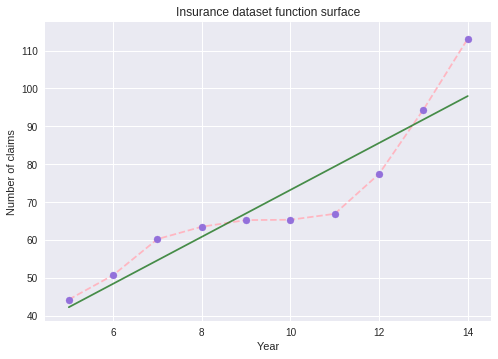

Claims prediction for 2011:  79.43072727272727    Real claims in 2011:  [66.94]
Claims prediction for 2014:  97.99618181818182    Real claims in 2014:  [113.11]


In [1]:
import numpy  as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from numpy   import genfromtxt

data=np.genfromtxt('insurance.csv',delimiter=',',skip_header=1)  # delimiter is comma, don't load the first line

n, p = data.shape

years = data[:,0:1]
claims = data[:,1:2]  # Target

plt.title("Insurance dataset function surface")
plt.xlabel("Year")
plt.ylabel("Number of claims")
plt.plot(years, claims, '--', c="lightpink", zorder = 1)  # '--': dashed line style. zorder = 1: deeper 
plt.scatter(years, claims, c="mediumpurple", zorder = 2)  # zorder = 2: above

simpleLRModel = linear_model.LinearRegression()
simpleLRModel.fit(years, claims)

plt.plot(years, simpleLRModel.predict(years),color='darkgreen',alpha=0.7)
plt.show()

print("Claims prediction for 2011: ", float(simpleLRModel.predict([[11]])), "   Real claims in 2011: ", claims[6])
print("Claims prediction for 2014: ", float(simpleLRModel.predict([[14]])), "   Real claims in 2014: ", claims[9])

As the graph shows, a **Linear Regression** model cannot fit a non-linear data distribution. The predictions made by this model are not accurate, as can be seen from the predictions made for the years 2011 and 2014. Therefore, it is necessary to use a model that generates a curve that does fit this type of complex distributions. The **Polynomial Regression** model can satisfy this condition.

## 2. Ordinary Least Squares in Polynomial Regression

First of all, we're going to design a model that doesn't use the *Sklearn* library. So, we need a function that, relying on the ***Ordinary Least Squares*** method, predicts the number of claims for a given year.

We should remember that the ***Ordinary Least Squares*** method finds that the minimum of the ***Mean Squared Error*** function is at the point where its derivative is equal to 0. The weights are obtained by evaluating the following expression:

$W = (X^TX)^{-1}X^TY$

Then, considering data is based on two variables $x_1$ and $x_2$, the data is then organized in a matrix like the following:

$
  X=
  \left[ {\begin{array}{cc}
   x_{11} & x_{12}\\
   x_{21} & x_{22}\\
  \end{array} } \right]
$

At this point, we must develop a method that transforms this previous matrix into a matrix of any degree, generating the polynomial features. In other words, this method will raise to the power of all existing powers between 0 and the number specified by the **degree** parameter. Let's say the desired **degree** is 3, then the resulting matrix will be:

$
  X=
  \left[ {\begin{array}{cc}
   1 & x_{11}  & x_{12} & x_{11}^2 & x_{12}^2 & x_{11}^3 & x_{12}^3 \\
   1 & x_{21} & x_{22} & x_{21}^2 & x_{22}^2 & x_{21}^3 & x_{22}^3 \\
  \end{array} } \right]
$

This function is coded as follows:







In [0]:
def transformMatDegree(M, degree):  # M: initial matrix
  
  rows, cols = M.shape
  result = np.ones((rows, 1), dtype=float)  # First column of 1's.
  
  for g in range(1,degree+1): result = np.hstack([result,np.power(M,g)])
  
  return result

Thus, this function is used to return the polynomial matrix, which is involved in calculating the weights of the ***Ordinary Least Squares***, making it possible to calculate the regression curve for each degree:

MSE for degree  1 :  57.04720206060608
MSE for degree  2 :  31.607381984848463
MSE for degree  3 :  2.935640696969643
MSE for degree  4 :  2.8754511829836122
MSE for degree  5 :  0.23210655478053846
MSE for degree  6 :  0.2180263187957247


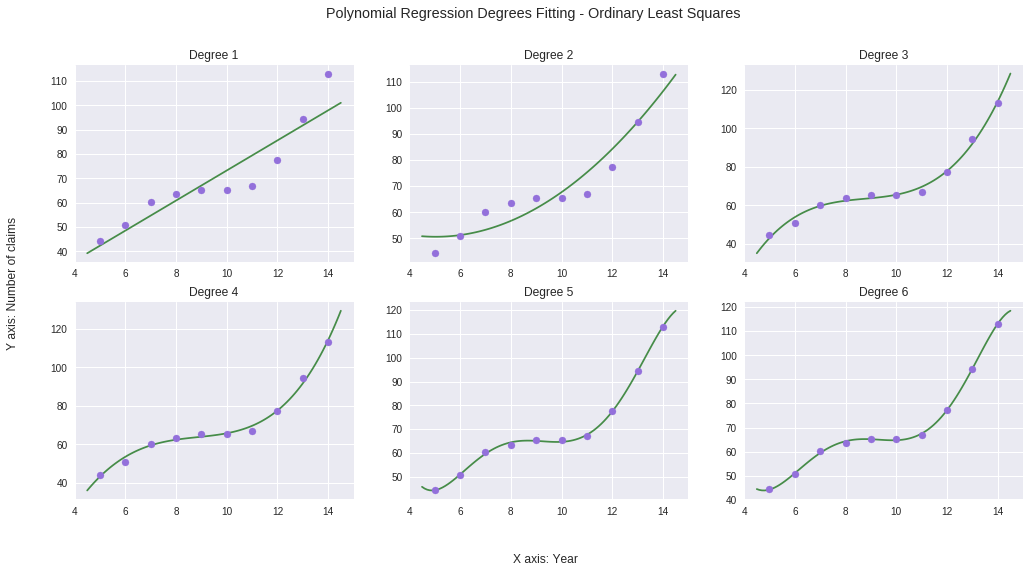

In [33]:
MSE = lambda Yp, Y: np.mean(np.power(Yp - Y, 2))  # Mean Squared Error

xmin, xmax = np.min(years), np.max(years)  # Useful for limiting the plots

fig = plt.figure(figsize=(17,8))  # Plot one main figure. This figure will include with 6 subfigures
fig.suptitle('Polynomial Regression Degrees Fitting - Ordinary Least Squares')
fig.text(0.51, 0.015, 'X axis: Year', ha='center')
fig.text(0.07, 0.5, 'Y axis: Number of claims', rotation='vertical', va='center')

maxdegree = 6  # maximum degree: 6

for deg in range(1,maxdegree+1):
  
  fig.add_subplot(2, maxdegree/2, deg)
  plt.title("Degree " + str(deg))
  plt.scatter(years, claims, c="mediumpurple", zorder = 2)  # Scatter with the data
  plt.xlim(xmin-1, xmax+1)

  tM = transformMatDegree(years, deg)  # Obtain polynomial matrix
  W = np.linalg.inv(tM.T @ tM) @ tM.T @ claims  # Obtain weights
  
  linyears = np.linspace(xmin-0.5, xmax+0.5, 100)[:, np.newaxis]  # Linear with which predictions are made
  plt.plot(linyears, transformMatDegree(linyears, deg) @ W, color='darkgreen', zorder = 1, alpha=0.7)  # Predict a regression curve for each degree
  
  print("MSE for degree ", deg, ": ", MSE(transformMatDegree(years, deg) @ W, claims))

plt.show()

As we can see, degree 1 makes the model underfitted, but as the degree increases the polynomial adapts better to the data. However, a high grade could cause an overfitting of the model, since the model will likely memorize the data. *"Virtue is the happy medium between two extremes"* (Aristotle).

## 3. Polynomial Regression - Sklearn.

We are going to repeat the same **Polynomial Regression** analysis that we have done in the previous section, but this time using the function ***sklearn.preprocessing.PolynomialFeatures()*** and ***sklearn.linear_model.LinearRegression()***. *Sklearn* can transform the X matrix to add polynomial coefficients and also their interactions, which we have not included in the previous exercise. Since adding the interactions does not lead, in this case, to better results, it has been decided not to add them only, not modifying the default argument *interaction_only = False* in *PolynomialFeatures()*:

MSE for degree  1 :  57.04720206060606
MSE for degree  2 :  31.607381984848466
MSE for degree  3 :  2.9356406969695703
MSE for degree  4 :  2.875451182983741
MSE for degree  5 :  0.2321065547789455
MSE for degree  6 :  0.21802631235443098


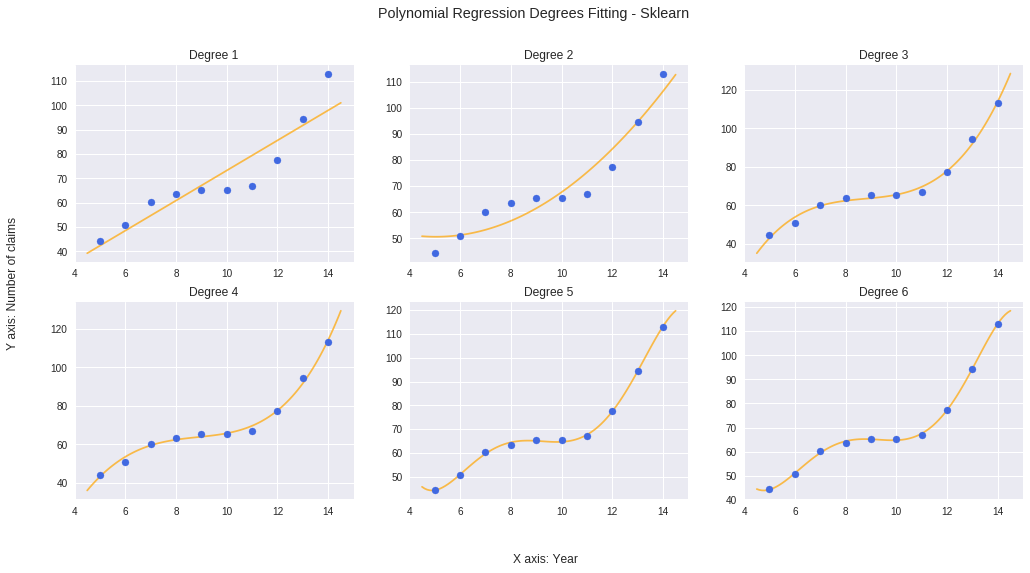

In [36]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

xmin, xmax = np.min(years), np.max(years)  # Useful for limiting the plots

fig = plt.figure(figsize=(17,8))  # Plot one main figure. This figure will include with 6 subfigures
fig.suptitle('Polynomial Regression Degrees Fitting - Sklearn')
fig.text(0.51, 0.015, 'X axis: Year', ha='center')
fig.text(0.07, 0.5, 'Y axis: Number of claims', rotation='vertical', va='center')

maxdegree = 6  # maximum degree: 6

for deg in range(1,maxdegree+1):
  
  fig.add_subplot(2, maxdegree/2, deg)
  plt.title("Degree " + str(deg))
  plt.scatter(years, claims, c="royalblue", zorder = 2)  # Scatter with the data
  plt.xlim(xmin-1, xmax+1)
  
  pol = PolynomialFeatures(deg)  # poly object only to generate the polynomial features below
  tM = pol.fit_transform(years)  # Obtain polynomial matrix
  
  simpleLRModel = linear_model.LinearRegression()  # Create a linear model
  simpleLRModel.fit(tM, claims)  # Fit the model with polynomial matrix and claims
  
  linyears = np.linspace(xmin-0.5, xmax+0.5, 100)[:, np.newaxis]  # Linear with which predictions are made
  
  # Predict a regression curve for each degree, but this time using sklearn model predict
  plt.plot(linyears, simpleLRModel.predict(pol.fit_transform(linyears)), color='orange', zorder = 1, alpha=0.7) 
  
  print("MSE for degree ", deg, ": ", mean_squared_error(claims, simpleLRModel.predict(tM)))

plt.show()

As we can see, both results are practically the same, in view of the fact that their **ECMs** almost match each other.